# Lab Exersice 3
*Author: Jakob Heller, Steffen Steiner, Clemens Konrad Müller*

1.a) Write a function xq = my_quant(x,N) that quantises a quasi amplitude-continuous signal x with a value range of $−1 \leq x \leq 1$ with an arbitrary, but odd number N of quantisation steps using the midtread uniform quantiser characteristic curve. Make use of the round function and the quantisation model that was introduced in the course.


In [148]:
%matplotlib inline 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def my_quant(x, N):
    #L = abs(max(x))+abs(min(x))
    #Q = L/N
    # limiter limits the input on x to a certain value so there is no overshoot
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    if(N%2!=0):
        Q = 2/(N-1)
        # linear uniform quantization
        xQ = Q * np.floor(x/Q + 1/2)
    else:
        Q = 2/(N)
        xQ = Q * np.floor(x/Q + 1/2)
        #cut last step and limit to the penultimate step
        xQ_max = max(xQ)
        idx = np.where(xQ > xQ_max-Q)
        xQ[idx] = xQ_max-Q
        
    return xQ


b) Test xq = my_quant(x,N) for a signal vector $x = -1:0.001:1$ and generate the left of fig. 1 using N = 17 quantisation steps.

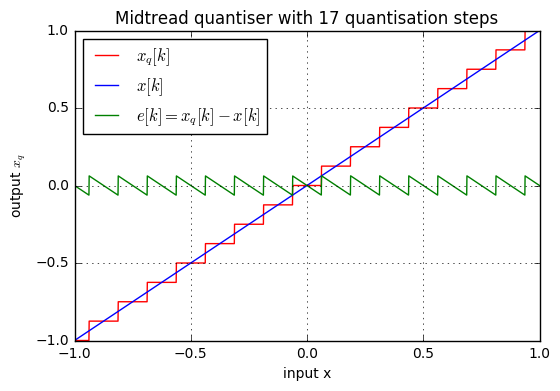

In [149]:
x = np.linspace(-1,1,2/0.001)
x_quant = my_quant(x, 17)
plt.figure
plt.plot(x,x_quant,'r', label='$x_q[k]$')
plt.plot(x,x, label='$x[k]$')
plt.plot(x,x_quant-x, 'g' , label='$e[k]=x_q[k]-x[k]$')
plt.legend(loc='upper left')
plt.title('Midtread quantiser with 17 quantisation steps')
plt.ylabel('output $x_q$')
plt.xlabel('input x')

plt.grid()

* c) Modify xq = my_quant(x,N) so that it also works for even N. To this end, the last quantisation step for positive amplitudes is increased, cf. g. 1 on the right. This models typical analogue-to-digital (ADC) / digital-to-analogue (DAC) converters that use N = $2^w$ quantisation steps with number of bits w ∈N. In video applications, typically 8 to 16 bit can be found, in audio typically 16 to 24 bit.
* d) Test the modied xq = my_quant(x,N) for a signal vector x = -1:0.001:1 and generate the right of fig. 1 using N = 16 quantisation steps, i.e. resolution of 4 bit.


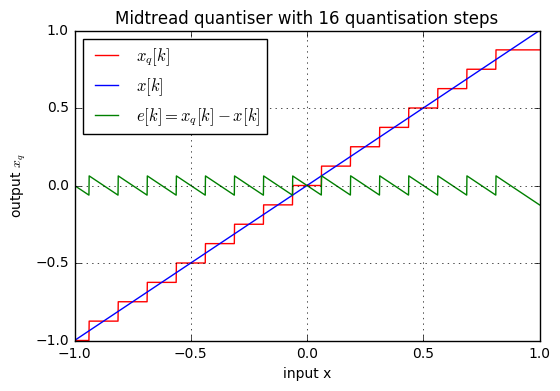

In [150]:
x = np.linspace(-1,1,2/0.001)
x_quant = my_quant(x,16)

plt.figure
plt.plot(x,x_quant,'r', label='$x_q[k]$')
plt.plot(x,x, label='$x[k]$')
plt.plot(x,x_quant-x, 'g' , label='$e[k]=x_q[k]-x[k]$')
plt.legend(loc='upper left')
plt.title('Midtread quantiser with 16 quantisation steps')
plt.ylabel('output $x_q$')
plt.xlabel('input x')
plt.grid()

## Exercise 2: Quantisation of dierent signals, SNR
Solve the following tasks in Matlab or Python. Code examples here follow Matlab syntax and have to be adjusted for Python.
* a) Generate a signal vector xSine that contains a discrete-time, zero-mean sine signal x[k] = A·sin(Ωk) with normalised discrete-time angular frequency Ω = 2πf/fs = 2π/50 and a variance $σ^2_x$ = 1/2 (as a time average measure) for 0 ≤ k < 50000. 

In [151]:
omega = (2*np.pi)/50

# Range
N=50000 #int

#maximum amplitude
A=1

k = np.arange(N)

#create sines
xSine = A * np.sin(omega*k)
#plt.plot(k,abs(np.fft.fftshift(np.fft.fft(xSine)))*(2/N))

np.var(xSine)

0.5

b) Generate a signal vector xNorm that contains a discrete-time, zero-mean, normally distributed noise signal (randn()) with a variance $σ^2_x$ = 0.0471 for 0 ≤ k < 50000. By doing so the signal amplitudes are mostly within the range −1 ≤ xNorm ≤ 1 and theoretically only 1 sample out of 100,000 samples has a larger amplitude |xNorm| > 1 that would clip the quantiser modeled in exercise 1, cf. [Zöl08, g. 2.5]

-0.00013775046114770142

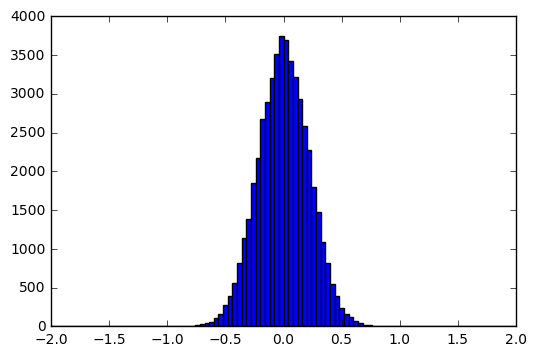

In [152]:
N = 50000
sigma = np.sqrt(0.0471)
#xNorm = np.random.normal(0,np.sqrt(0.0471),N)
xNorm = sigma * np.random.randn(N)
#plt.plot(k,xNorm)
bins = np.linspace(-2,2,101)
plt.hist(xNorm,bins);
np.mean(xNorm)

c) Generate a signal vector xUniform that contains a discrete-time, zero-mean, uniformly distributed noise signal (rand()) with a variance $σ^2_x$ = 1/3 for 0 ≤ k < 50000. By doing so the signal amplitudes are theoretically within the range −1 ≤ xUniform ≤ 1, cf. [Zöl08, p. 23].


0.33163219241189146

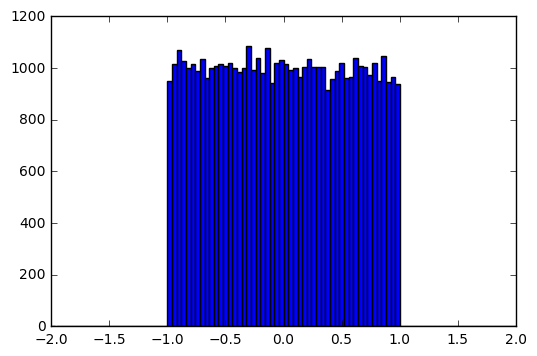

In [153]:
N = 50000
xUniform = np.random.uniform(-1,1,N)
#plt.plot(k,xUniform)
bins = np.linspace(-2,2,101)
plt.hist(xUniform,bins);
np.var(xUniform)

d) Generate a signal vector xLaplace that contains a discrete-time, zero-mean, noise signal following the Laplace distribution (laprnd()) with a variance $σ^2_x$ = 0.0175 for 0 ≤ k < 50000. 

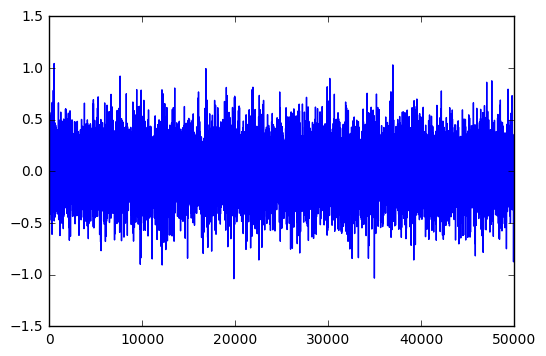

In [154]:
N = 50000
loc = 0
scale = np.sqrt( 0.0236/2)
#scale = np.sqrt( 0.0175/2)
xLaplace = np.random.laplace(loc,scale,N)
plt.plot(k,xLaplace)
#bins = np.linspace(-2,2,101)
#plt.hist(xLaplace,bins);
#print(np.var(xLaplace))

e) Generate fig. 2: apply the 4 generated signals to the quantisation with xq = my_quant(x,N)
from exercise 1 for different numbers of bits and calculate the signal-to-noise ratio in dB
as
\begin{equation}
    SNR=10 \cdot log_{10} \frac{\sigma_x²}{\sigma_e²}
\end{equation}

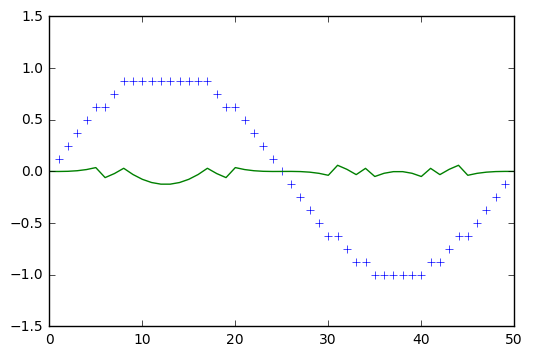

In [155]:
#this is for visualization only
xSine_q=my_quant(xSine, 16)
xSine_e=xSine_q-xSine
plt.plot(k,xSine_q,'+')
plt.plot(k,xSine_e)
plt.axis([0, 50, -1.5, 1.5]); 

In [156]:
#to find the SNR we define a function that computes the SNR depending on the bitwidth
def SNR(f, bit): #enter [function, Number of bits]
    Q = 1/(2**(bit-1))
    N = (2/Q)
    #N = 2**(bit)
    fq=my_quant(f,N) #quantised signal
    #fe=np.abs(fq-f) #resulting error
    fe=fq-f #resulting error
    vf=  np.var(f)#variance of the signal
    ve=  np.var(fe)#variance of the error 
    snr=10* np.log10(vf/ve)#SNR
    return snr 
    
bitwidth=np.linspace(2,20,19) #bit iteration vector / start=2 as other values seem to be nonsense

#theoratic SNR for the given signals 
SNR_xSine_th=6.02*(bitwidth)+1.76
SNR_xNorm_th=6.02*bitwidth-8.5
SNR_xUniform_th=6.02*bitwidth
SNR_xLaplace_th=6.02*bitwidth-9

In [157]:
#we sweep through the SNR computation with different bitwidth
def bitwidth_sweep_SNR(f, bitwidth):
    snr=np.zeros(len(bitwidth))
    for i in range(0,len(bitwidth)): #iterate i over the array
        snr[i]=SNR(f,bitwidth[i])
    return snr

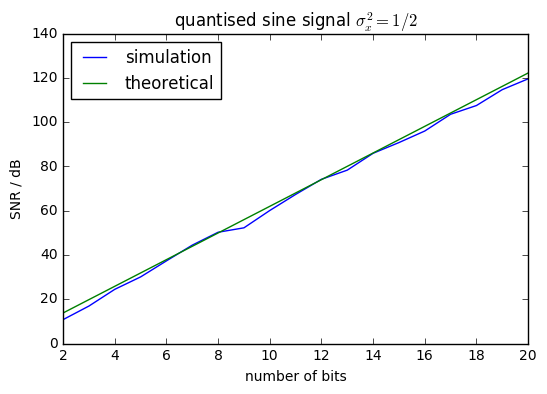

In [158]:
xSine_SNR_sweep=bitwidth_sweep_SNR(xSine, bitwidth)
plt.plot(bitwidth, xSine_SNR_sweep, label='simulation')
plt.plot(bitwidth,SNR_xSine_th, label='theoretical')
plt.legend(loc='upper left')
plt.title('quantised sine signal $\sigma _x^2=1/2$')
plt.ylabel('SNR / dB')
plt.xlabel('number of bits')

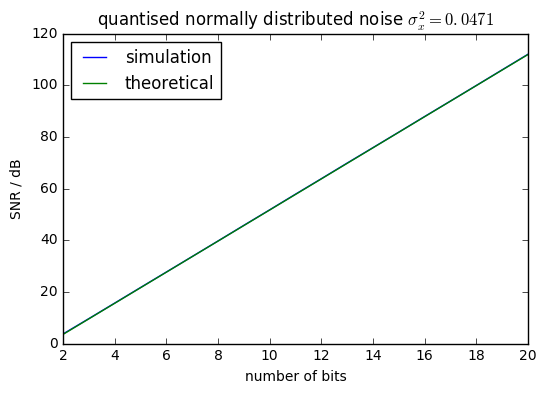

In [159]:
xNorm_SNR_sweep=bitwidth_sweep_SNR(xNorm, bitwidth)
plt.plot(bitwidth, xNorm_SNR_sweep, label='simulation')
plt.plot(bitwidth,SNR_xNorm_th, label='theoretical')
plt.legend(loc='upper left')
plt.title('quantised normally distributed noise $\sigma _x^2=0.0471$')
plt.ylabel('SNR / dB')
plt.xlabel('number of bits')

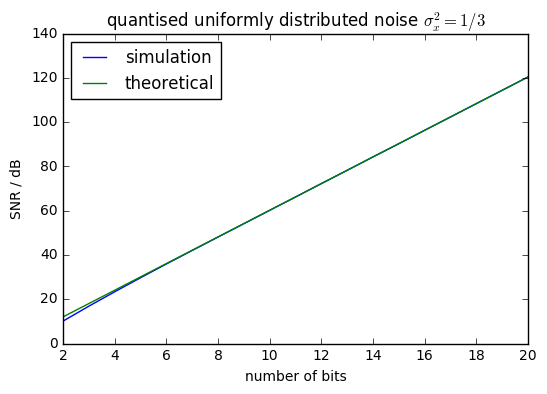

In [160]:
xUniform_SNR_sweep=bitwidth_sweep_SNR(xUniform, bitwidth)
plt.plot(bitwidth, xUniform_SNR_sweep, label='simulation')
plt.plot(bitwidth,SNR_xUniform_th, label='theoretical')
plt.legend(loc='upper left')
plt.title('quantised uniformly distributed noise $\sigma _x^2=1/3$')
plt.ylabel('SNR / dB')
plt.xlabel('number of bits')

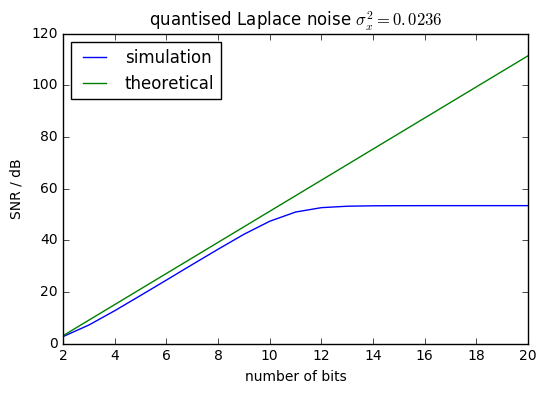

In [161]:
xLaplace_SNR_sweep=bitwidth_sweep_SNR(xLaplace, bitwidth)
plt.plot(bitwidth, xLaplace_SNR_sweep, label='simulation')
plt.plot(bitwidth,SNR_xLaplace_th, label='theoretical')
plt.legend(loc='upper left')
plt.title('quantised Laplace noise $\sigma _x^2=0.0236$')
plt.ylabel('SNR / dB')
plt.xlabel('number of bits')

## Exercise 2: Quantisation of different signals, SNR
* a) Generate the sine signal x[k] defined above.

In [162]:
fsin = 960
fs = 48000
N = 50000
k = np.arange(N)
Q = 1/4
A = Q
x = A*np.sin(2*np.pi*fsin*k/fs)

b) Generate the dither noise dRECT[k] according to the PDF pRECT(d) = 1/Q*rect(d/Q). Check the resulting amplitude and distribution carefully. The length of dRECT[k] and x[k] must be equal.


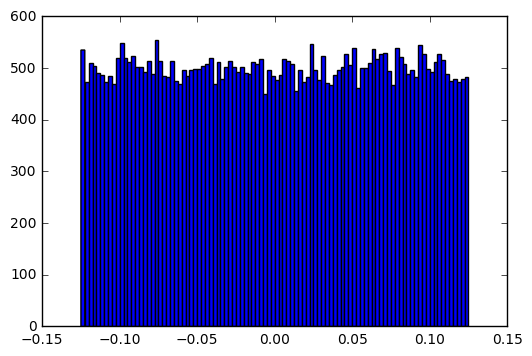

In [163]:

dRect = np.random.uniform(-Q/2,Q/2,N)
#plt.plot(dRect)
bins = np.linspace(-Q/2,Q/2,101)
plt.hist(dRect,bins);

c) Generate the dither noise dTRI[k] according to the PDF pTRI(d) = 1/Q*tri(d/Q). Check the resulting amplitude and distribution carefully. The length of dTRI[k] and x[k] must be equal.


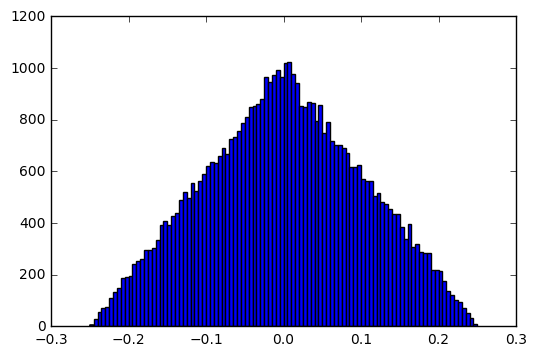

In [190]:
dTri = np.random.triangular(left=-Q,mode=0,right=Q,size=N)
bins = np.linspace(-Q,Q,101)
plt.hist(dTri,bins);

d) Add each dither noise dRECT[k] and dTRI[k] individually to x[k]. Together with the original signal without dithering you now have three vectors, e.g. named xNODITH, xRECT and xTRI.


In [191]:
xNodith = x
xRect = x+dRect
xTri = x+dTri

e) Quantise these signals individually with xq = my_quant(x,N) from exercise 1, leading to xqNODITH, xqRECT and xqTRI for $N = 2^w = 2^3 = 8$ quantisation steps.

In [192]:
#we use 9 because 8 doesn't work with $|x_{max}|=1$ in the quantizer
xq_Nodith = my_quant(xNodith,9)
xq_Rect = my_quant(xRect,9)
xq_Tri = my_quant(xTri,9)
e_Nodith = xq_Nodith-xNodith
e_Rect = xq_Rect-xNodith
e_Tri = xq_Tri - xNodith

* f) Generate the left column of fig. 5. Plot three signal periods of the sine function. Please note: (i) since you are dealing with discrete-time signals, stem plots would be the most correct visualisation, which for reasons of clarity and comprehensibility should not be used here and (ii) since random signal generators are involved, your results might slightly differ. Interpret the graphics.

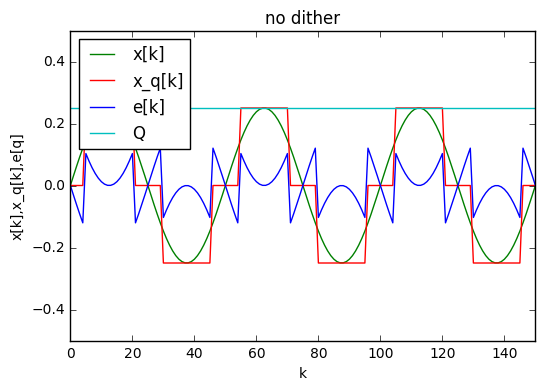

In [193]:
Q_vec = Q*np.ones(N)
plt.plot(xNodith, label='x[k]',color='g')
plt.plot(xq_Nodith, label='x_q[k]',color='r')
plt.plot(e_Nodith, label='e[k]',color='b')
plt.plot(Q_vec, label='Q',color='c')
plt.legend(loc='upper left')
plt.title('no dither')
plt.ylabel('x[k],x_q[k],e[q]')
plt.xlabel('k')
plt.axis([0, 150, -0.5, 0.5]); 

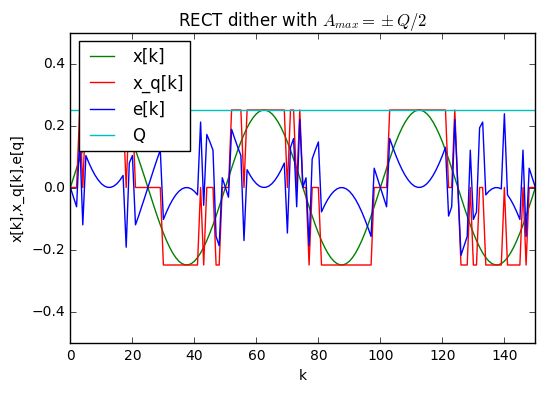

In [194]:
plt.plot(xNodith, label='x[k]',color='g')
plt.plot(xq_Rect, label='x_q[k]',color='r')
plt.plot(e_Rect, label='e[k]',color='b')
plt.plot(Q_vec, label='Q',color='c')
plt.legend(loc='upper left')
plt.title('RECT dither with $A_{max}=\pm Q/2$')
plt.ylabel('x[k],x_q[k],e[q]')
plt.xlabel('k')
plt.axis([0, 150, -0.5, 0.5]); 

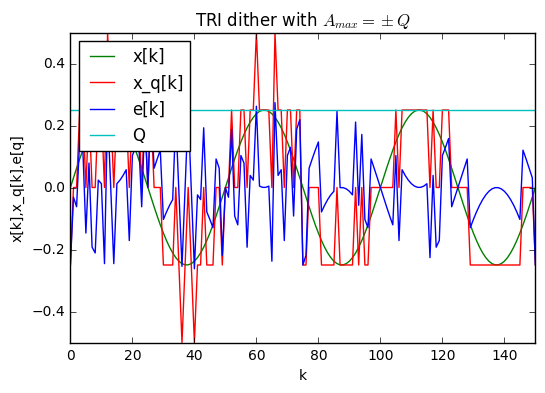

In [195]:
plt.plot(xNodith, label='x[k]',color='g')
plt.plot(xq_Tri, label='x_q[k]',color='r')
plt.plot(e_Tri, label='e[k]',color='b')
plt.plot(Q_vec, label='Q',color='c')
plt.legend(loc='upper left')
plt.title('TRI dither with $A_{max}=\pm Q$')
plt.ylabel('x[k],x_q[k],e[q]')
plt.xlabel('k')
plt.axis([0, 150, -0.5, 0.5]);